# Handling Imbalanced Data — Upsampling & Downsampling

**Objective**: Learn what imbalanced data is, why it hurts ML models, and how to fix it using **random upsampling** and **downsampling**.

---

## What is Imbalanced Data?

A dataset is **imbalanced** when one class (usually the negative or majority class) has **far more samples** than the other (minority class).

**Example**: Fraud detection
- 99.8% transactions → Normal (Class 0)
- 0.2% transactions → Fraud (Class 1)

---

## Why It Matters

Standard ML models (Logistic Regression, Decision Trees, etc.) **optimize for accuracy**.

With imbalance:
- Model predicts **majority class every time** → 99% accuracy
- But **fails completely on minority class** → 0% recall for fraud

**Bias toward majority class** → **Poor performance on rare but important events**.

---

## Techniques to Handle Imbalance

| Technique | How it Works | Pros | Cons |
|---------|--------------|------|------|
| **Upsampling** | Duplicate minority class | Keeps all data | Risk of overfitting |
| **Downsampling** | Remove majority samples | Faster training | Loss of information |
| SMOTE | Create synthetic samples | Better generalization | (Covered next) |

We’ll focus on **random up/downsampling** — simple & effective for small datasets.

## 1. Create Imbalanced Synthetic Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)  

# Parameters
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

print(f"Class 0 (majority): {n_class_0}")
print(f"Class 1 (minority): {n_class_1}")

Class 0 (majority): 900
Class 1 (minority): 100


In [18]:
# Generate Class 0: centered at (0,0)
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(0, 1, n_class_0), # Syntax : np.random.normal(mean, stddev, size)
    'feature_2': np.random.normal(0, 1, n_class_0),
    'target': [0] * n_class_0
})

# Generate Class 1: centered at (2,2)
class_1 = pd.DataFrame({
    'feature_1': np.random.normal(2, 1, n_class_1),
    'feature_2': np.random.normal(2, 1, n_class_1),
    'target': [1] * n_class_1
})

# Combine into one dataset
df = pd.concat([class_0, class_1]).reset_index(drop=True) # reset_index to reindex after concatenation means drop the old index

print(f"Final dataset shape: {df.shape}")

Final dataset shape: (1000, 3)


In [19]:
df.head()

,feature_1,feature_2,target
0,-0.033025,-0.116571,0
1,-0.503650,0.214169,0
2,-0.172375,-0.976620,0
3,0.714732,0.160269,0
4,1.277857,-0.423834,0


In [20]:
df.tail()

,feature_1,feature_2,target
995,1.221691,3.301102,1
996,1.556571,0.001655,1
997,1.729730,1.294683,1
998,3.612868,2.495766,1
999,2.946618,2.644388,1


## 2. Visualize Imbalance

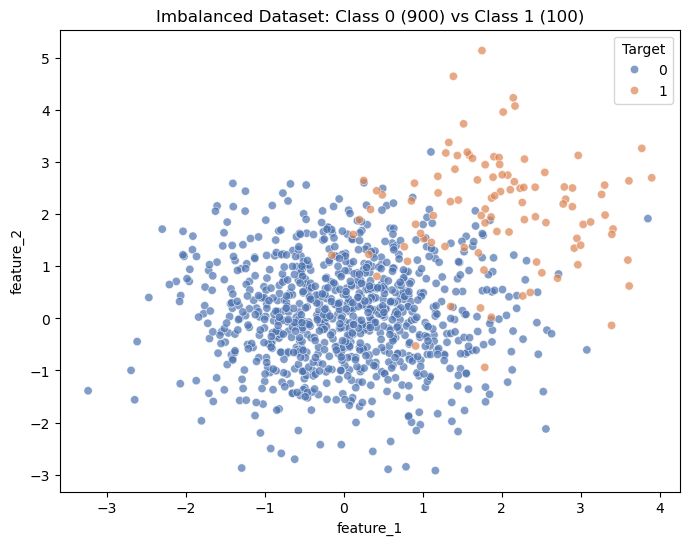

In [4]:
# Scatter plot: Show spatial separation + count difference
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='feature_1', y='feature_2', hue='target', palette='deep', alpha=0.7)
plt.title('Imbalanced Dataset: Class 0 (900) vs Class 1 (100)')
plt.legend(title='Target')
plt.show()

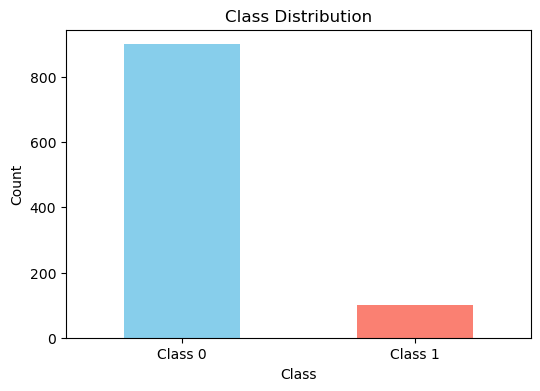

target
0    900
1    100
Name: count, dtype: int64


In [5]:
# Bar plot: Clear count comparison
plt.figure(figsize=(6, 4))
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Class 0', 'Class 1'], rotation=0)
plt.show()

print(df['target'].value_counts())

## 3. Upsampling the Minority Class

**Goal**: Increase Class 1 from 100 → 900 by **duplicating random samples**.

In [21]:
from sklearn.utils import resample # resample is used for upsampling and downsampling

# Split classes
df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

# Upsample minority class
# replace=True → allow duplicates
df_minority_upsampled = resample( # Syntax : resample(data to be resampled, replace, n_samples, random_state)
    df_minority,
    replace=True, # sample with replacement means allow duplicates
    n_samples=len(df_majority),  # match majority size
    random_state=42 # random_state determines the random number for shuffling and sampling
)

print(f"Upsampled minority shape: {df_minority_upsampled.shape}")

Upsampled minority shape: (900, 3)


After Upsampling:
target
0    900
1    900
Name: count, dtype: int64


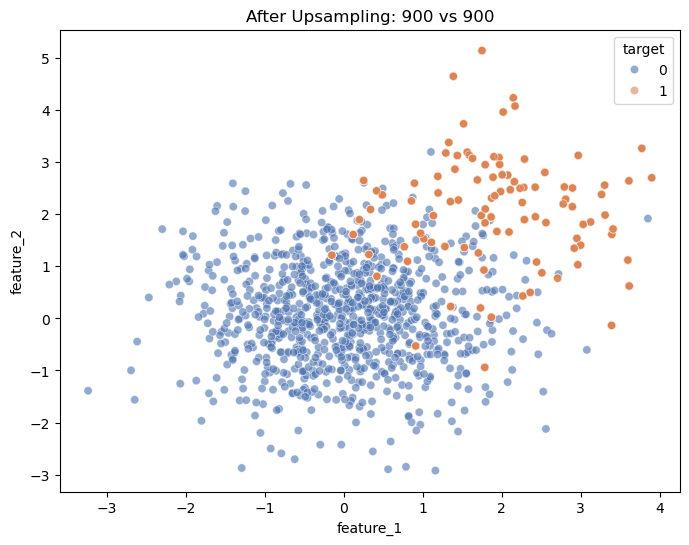

In [7]:
# Combine back
df_upsampled = pd.concat([df_majority, df_minority_upsampled]).reset_index(drop=True)

print("After Upsampling:")
print(df_upsampled['target'].value_counts())

# Visualize balanced data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_upsampled, x='feature_1', y='feature_2', hue='target', palette='deep', alpha=0.6)
plt.title('After Upsampling: 900 vs 900')
plt.show()

> **When to use upsampling?**
> - Small datasets
> - When minority class is **very rare** but critical
> - With regularization (to reduce overfitting)

## 4. Downsampling the Majority Class

**Goal**: Reduce Class 0 from 900 → 100 by **randomly removing samples**.

In [ ]:
# Downsample majority class
# replace=False → no duplicates
df_majority_downsampled = resample( # Syntax : resample(data to be resampled, replace, n_samples, random_state)
    df_majority,
    replace=False, # sample without replacement means no duplicates
    n_samples=len(df_minority),  # match minority size
    random_state=42 # random_state determines the random number for shuffling and sampling
)

print(f"Downsampled majority shape: {df_majority_downsampled.shape}")

Downsampled majority shape: (100, 3)


After Downsampling:
target
0    100
1    100
Name: count, dtype: int64


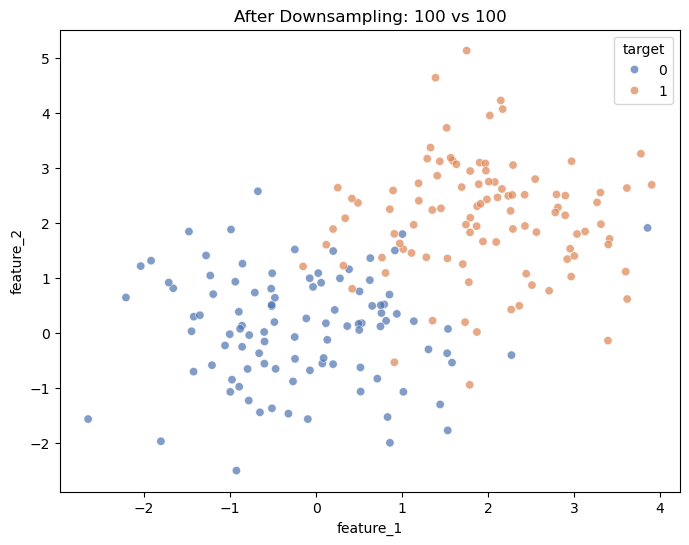

In [9]:
# Combine
df_downsampled = pd.concat([df_majority_downsampled, df_minority]).reset_index(drop=True)

print("After Downsampling:")
print(df_downsampled['target'].value_counts())

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_downsampled, x='feature_1', y='feature_2', hue='target', palette='deep', alpha=0.7)
plt.title('After Downsampling: 100 vs 100')
plt.show()

> **When to use downsampling?**
> - Large datasets
> - Fast prototyping
> - When majority class has **redundant information**

## 5. Comparison Summary

In [10]:
summary = pd.DataFrame({
    'Technique': ['Original', 'Upsampling', 'Downsampling'],
    'Class 0': [900, 900, 100],
    'Class 1': [100, 900, 100],
    'Total Samples': [1000, 1800, 200],
    'Notes': [
        'Highly imbalanced',
        'Risk of overfitting',
        'Risk of data loss'
    ]
})

summary

,Technique,Class 0,Class 1,Total Samples,Notes
0,Original,900,100,1000,Highly imbalanced
1,Upsampling,900,900,1800,Risk of overfitting
2,Downsampling,100,100,200,Risk of data loss


## 6. Key Takeaways

| Point | Insight |
|------|--------|
| **Imbalance hurts** | Models ignore minority class |
| **Upsampling** | Duplicates minority → more training signal |
| **Downsampling** | Removes majority → faster, less redundancy |
| **Random sampling is simple** | But not ideal for complex patterns |
| **Next**: Use **SMOTE** for smarter synthetic samples |

---
**End of Notebook**